In [151]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
df = pd.read_csv("brain_tumor_dataset.csv")
df

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,21,Male,Malignant,9.612013,Parietal,Medulloblastoma,III,Seizures,Nausea,Vision Issues,No,No,Yes,58.229662,0.353806,No,Negative,Yes
19996,19997,32,Female,Benign,1.543560,Temporal,Meningioma,III,Headache,Headache,Vision Issues,Yes,Yes,No,77.706856,2.341074,No,Positive,No
19997,19998,57,Female,Benign,3.618634,Temporal,Medulloblastoma,I,Seizures,Vision Issues,Nausea,No,No,Yes,89.543803,2.332881,No,Positive,Yes
19998,19999,68,Male,Malignant,8.519086,Parietal,Glioblastoma,III,Seizures,Headache,Vision Issues,Yes,Yes,Yes,83.306781,2.387202,No,Positive,No


In [115]:
df.describe()

,Patient_ID,Age,Tumor_Size,Survival_Rate,Tumor_Growth_Rate
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,49.433700,5.236552,70.131699,1.547701
std,5773.647028,17.389296,2.754359,17.270834,0.835995
min,1.000000,20.000000,0.500410,40.002386,0.100017
25%,5000.750000,34.000000,2.836686,55.224439,0.830433
50%,10000.500000,49.000000,5.200675,70.305066,1.541821
75%,15000.250000,65.000000,7.624299,85.043395,2.262484
max,20000.000000,79.000000,9.999420,99.998125,2.999835


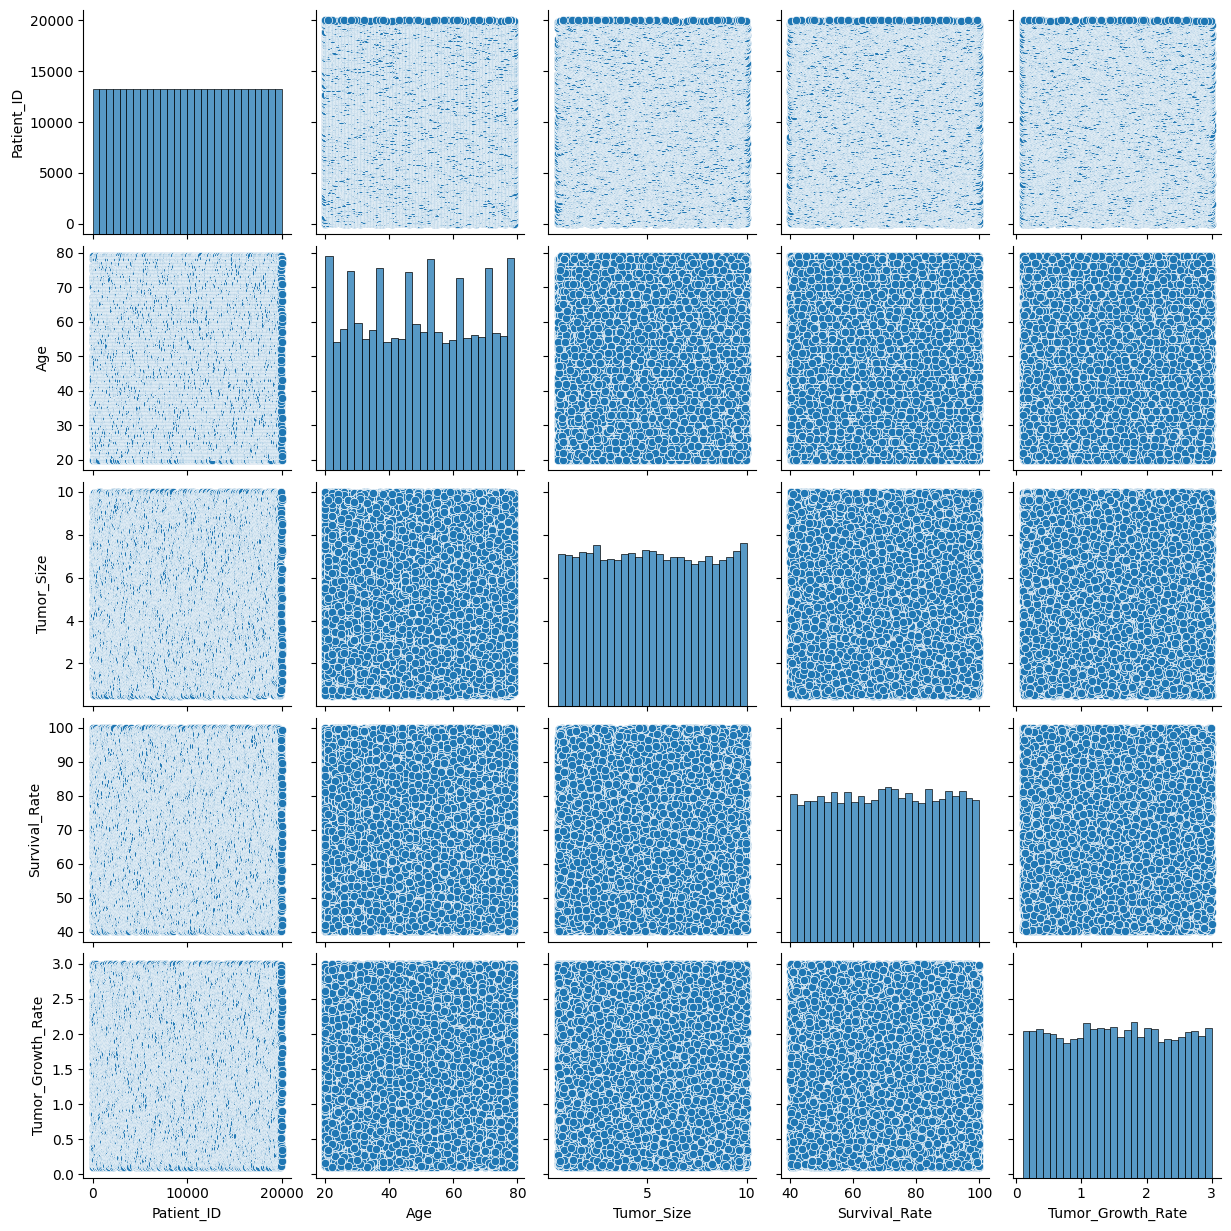

In [129]:
sns.pairplot(df)

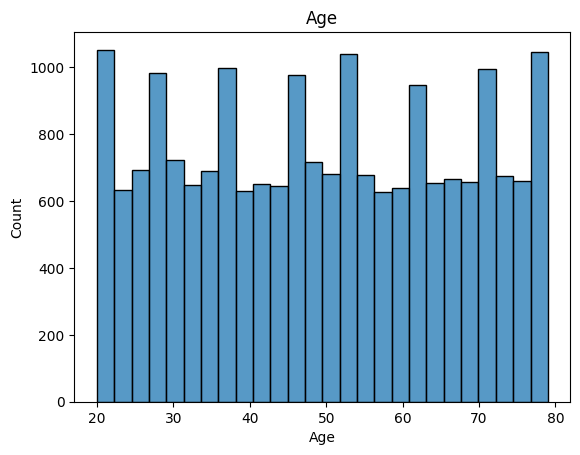

In [128]:
sns.histplot(df, x=df['Age'])
plt.title("Age")
plt.show()

<Axes: xlabel='Histology', ylabel='count'>

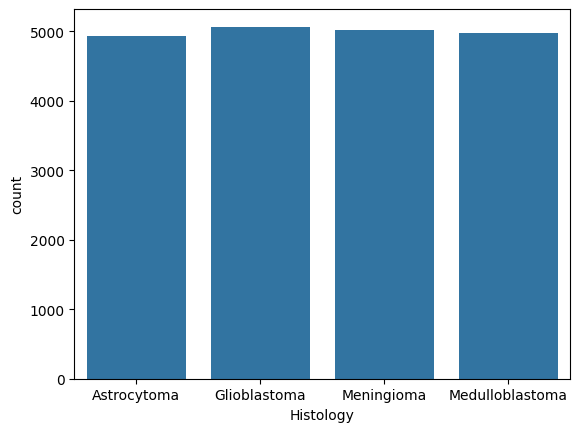

In [125]:
sns.countplot(df, x="Histology")

<Axes: xlabel='Location', ylabel='count'>

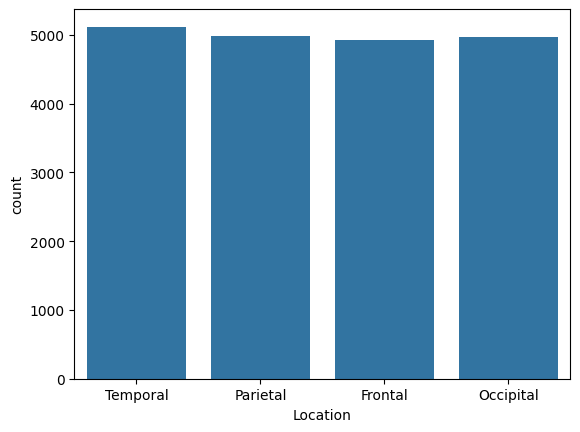

In [124]:
sns.countplot(df, x="Location")

<Axes: xlabel='Gender', ylabel='count'>

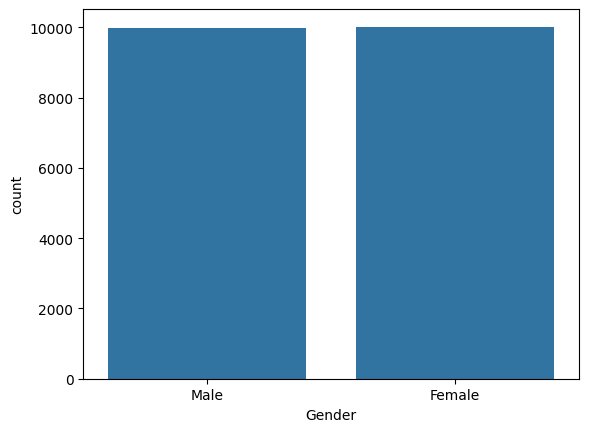

In [ ]:
sns.countplot(df, x="Gender")

<Axes: xlabel='MRI_Result', ylabel='count'>

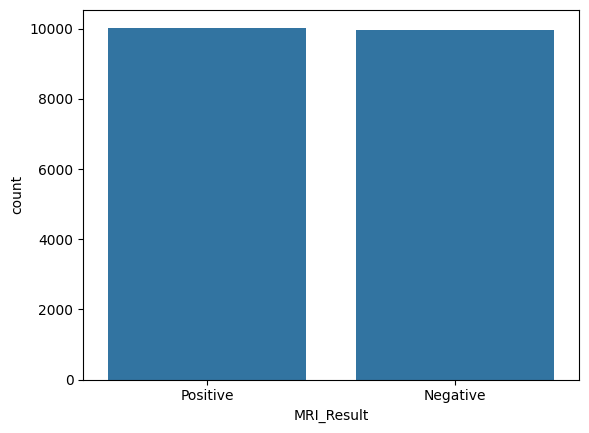

In [117]:
sns.countplot(df, x="MRI_Result")

In [4]:
df.isna().sum()

Patient_ID             0
Age                    0
Gender                 0
Tumor_Type             0
Tumor_Size             0
Location               0
Histology              0
Stage                  0
Symptom_1              0
Symptom_2              0
Symptom_3              0
Radiation_Treatment    0
Surgery_Performed      0
Chemotherapy           0
Survival_Rate          0
Tumor_Growth_Rate      0
Family_History         0
MRI_Result             0
Follow_Up_Required     0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [171]:
X = df.drop(columns=["MRI_Result", "Patient_ID"])
y = df["MRI_Result"]

In [172]:
X

,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,Follow_Up_Required
0,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Yes
1,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Yes
2,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,No
3,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,No
4,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,21,Male,Malignant,9.612013,Parietal,Medulloblastoma,III,Seizures,Nausea,Vision Issues,No,No,Yes,58.229662,0.353806,No,Yes
19996,32,Female,Benign,1.543560,Temporal,Meningioma,III,Headache,Headache,Vision Issues,Yes,Yes,No,77.706856,2.341074,No,No
19997,57,Female,Benign,3.618634,Temporal,Medulloblastoma,I,Seizures,Vision Issues,Nausea,No,No,Yes,89.543803,2.332881,No,Yes
19998,68,Male,Malignant,8.519086,Parietal,Glioblastoma,III,Seizures,Headache,Vision Issues,Yes,Yes,Yes,83.306781,2.387202,No,No


In [173]:
X = X.join(pd.get_dummies(X['Gender'], drop_first=True, dtype=int, prefix="Gender"))
X = X.join(pd.get_dummies(X['Tumor_Type'], drop_first=True, dtype=int, prefix="Tumor"))
X = X.join(pd.get_dummies(X['Location'], drop_first=True, dtype=int, prefix="Location"))
X = X.join(pd.get_dummies(X['Histology'], drop_first=True, dtype=int, prefix="Histology"))
X = X.join(pd.get_dummies(X['Stage'], drop_first=True, dtype=int, prefix="Stage"))
X = X.join(pd.get_dummies(X['Symptom_1'], drop_first=True, dtype=int, prefix="Symptom_1"))
X = X.join(pd.get_dummies(X['Symptom_2'], drop_first=True, dtype=int, prefix="Symptom_2"))
X = X.join(pd.get_dummies(X['Symptom_3'], drop_first=True, dtype=int, prefix="Symptom_3"))
X = X.join(pd.get_dummies(X['Radiation_Treatment'], drop_first=True, dtype=int))
X = X.join(pd.get_dummies(X['Surgery_Performed'], drop_first=True, dtype=int, prefix="Surgery_Performed"))
X = X.join(pd.get_dummies(X['Chemotherapy'], drop_first=True, dtype=int, prefix="Chemotherapy"))
X = X.join(pd.get_dummies(X['Family_History'], drop_first=True, dtype=int, prefix="Family_History"))
#X = X.join(pd.get_dummies(X['MRI_Result'], drop_first=True, dtype=int, prefix="MRI_Result"))
X = X.join(pd.get_dummies(X['Follow_Up_Required'], drop_first=True, dtype=int, prefix="Follow_Up_Required"))

X = X.drop(columns = ["Gender", "Tumor_Type", "Location", "Histology", "Stage", "Symptom_1", "Symptom_2", "Symptom_3", "Radiation_Treatment", "Surgery_Performed", "Chemotherapy", "Family_History", "Follow_Up_Required"])


In [94]:
X

,Age,Tumor_Size,Survival_Rate,Tumor_Growth_Rate,Gender_Male,Tumor_Malignant,Location_Occipital,Location_Parietal,Location_Temporal,Histology_Glioblastoma,...,Symptom_2_Seizures,Symptom_2_Vision Issues,Symptom_3_Nausea,Symptom_3_Seizures,Symptom_3_Vision Issues,Yes,Surgery_Performed_Yes,Chemotherapy_Yes,Family_History_Yes,Follow_Up_Required_Yes
0,73,5.375612,51.312579,0.111876,1,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
1,26,4.847098,46.373273,2.165736,1,0,0,1,0,1,...,0,0,1,0,0,1,1,1,1,1
2,31,5.588391,47.072221,1.884228,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,29,1.436600,51.853634,1.283342,1,1,0,0,1,0,...,1,0,0,0,0,1,0,1,1,0
4,54,2.417506,54.708987,2.069477,0,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,21,9.612013,58.229662,0.353806,1,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,1
19996,32,1.543560,77.706856,2.341074,0,0,0,0,1,0,...,0,0,0,0,1,1,1,0,0,0
19997,57,3.618634,89.543803,2.332881,0,0,0,0,1,0,...,0,1,1,0,0,0,0,1,0,1
19998,68,8.519086,83.306781,2.387202,1,1,0,1,0,1,...,0,0,0,0,1,1,1,1,0,0


In [176]:
y = y.replace({"Positive": 1, "Negative": 0})

In [177]:
y

0        1
1        1
2        0
3        0
4        1
        ..
19995    0
19996    1
19997    1
19998    1
19999    0
Name: MRI_Result, Length: 20000, dtype: int64

Training

In [178]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [180]:
dtree_reg = RandomForestRegressor(random_state=42)

In [181]:
dtree_reg = dtree_reg.fit(X_train, y_train)

In [182]:
y_pred_dtree_reg = dtree_reg.predict(X_test)

In [183]:
y_pred_dtree_reg

array([0.44, 0.45, 0.45, ..., 0.5 , 0.6 , 0.38])

In [184]:
yes = 0
for i in y_pred_dtree_reg:
    if i > 0.5:
        yes += 1

print("total count", len(y_pred_dtree_reg))
print("Yes count:", yes)

total count 4000
Yes count: 1889


In [213]:
dtree = DecisionTreeClassifier(criterion="gini", random_state=42)
dtree = dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

print("Depth:   ", dtree.get_depth())
print("Leaves:  ", dtree.get_n_leaves())
print("accuracy ", accuracy_score(y_test, y_pred_dtree))
print("recall   ", recall_score(y_test, y_pred_dtree))
print("precision", precision_score(y_test, y_pred_dtree))
print("f1       ", f1_score(y_test, y_pred_dtree))

Depth:    39
Leaves:   4092
accuracy  0.49875
recall    0.4957178841309824
precision 0.4949698189134809
f1        0.49534356909136673


In [214]:
dtree = DecisionTreeClassifier(criterion="entropy", random_state=42)

In [215]:
dtree = dtree.fit(X_train, y_train)

Evaluation

In [216]:
y_pred_dtree = dtree.predict(X_test)

In [217]:
print("Depth:   ", dtree.get_depth())
print("Leaves:  ", dtree.get_n_leaves())
print("accuracy ", accuracy_score(y_test, y_pred_dtree))
print("recall   ", recall_score(y_test, y_pred_dtree))
print("precision", precision_score(y_test, y_pred_dtree))
print("f1       ", f1_score(y_test, y_pred_dtree))

Depth:    44
Leaves:   4006
accuracy  0.4895
recall    0.48513853904282117
precision 0.4856278366111952
f1        0.48538306451612906


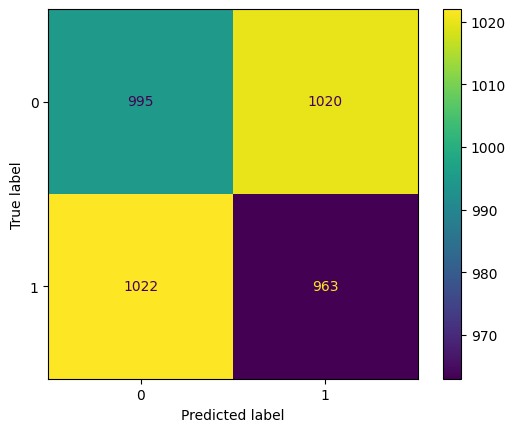

In [197]:
cm = metrics.confusion_matrix(y_test.values, y_pred_dtree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtree.classes_)
disp.plot()

Random forest

In [200]:
def train_rf(X, y, _n_estimator=100, _max_features="sqrt", _max_depth=6, _max_leaf_nodes=6):
    rf = RandomForestClassifier(n_estimators=_n_estimator, max_features=_max_features, max_depth=_max_depth, max_leaf_nodes=_max_leaf_nodes)

    rf = rf.fit(X, y)
    y_pred_rf = rf.predict(X_test)

    print("\naccuracy ", accuracy_score(y_test, y_pred_rf))
    #print("recall   ", recall_score(y_test, y_pred_rf))
    #print("precision", precision_score(y_test, y_pred_rf))
    #print("f1       ", f1_score(y_test, y_pred_rf))

In [201]:
train_rf(X_train, y_train)


accuracy  0.497


In [106]:
train_rf(X_train, y_train, 1)
train_rf(X_train, y_train, 50)
train_rf(X_train, y_train, 500)


accuracy  0.49325

accuracy  0.49925

accuracy  0.49525


In [107]:
train_rf(X_train, y_train, 100, "sqrt", 1)
train_rf(X_train, y_train, 100, "sqrt", 2)
train_rf(X_train, y_train, 100, "sqrt", 3)


accuracy  0.497

accuracy  0.502

accuracy  0.4965


In [108]:
train_rf(X_train, y_train, 100, "sqrt", 6, 2)
train_rf(X_train, y_train, 100, "sqrt", 6, 3)
train_rf(X_train, y_train, 100, "sqrt", 6, 4)


accuracy  0.49675

accuracy  0.49475

accuracy  0.49675


In [244]:
param_grid = [
  {"criterion":["entropy", "gini", "log_loss"], "n_estimators": [2, 3, 4, 5, 6, 20, 100], "max_features": ["sqrt", "log2"], "max_depth": [3, 4, 5, 6, 7, 8, 9, 10], "max_leaf_nodes": [2, 3, 4, 5, 6]}
 ]

In [245]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid)

grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=4, max_leaf_nodes=6, n_estimators=20,
                       random_state=42)


In [228]:
rf = RandomForestClassifier(criterion='entropy', max_depth=2, max_features='log2', max_leaf_nodes=4, n_estimators=3, random_state=42)

rf = rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\naccuracy ", accuracy_score(y_test, y_pred_rf))


accuracy  0.49625


In [250]:
rf = RandomForestClassifier(criterion='entropy', max_depth=3, max_features='log2', max_leaf_nodes=4, n_estimators=6, random_state=42)

rf = rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\naccuracy ", accuracy_score(y_test, y_pred_rf))


accuracy  0.504


In [296]:
rf = RandomForestClassifier(criterion='entropy', max_depth=3, max_features='log2', max_leaf_nodes=4, n_estimators=100, random_state=42)

rf = rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\naccuracy ", accuracy_score(y_test, y_pred_rf))


accuracy  0.5
